# 决策树

决策树是一种树型结构的机器学习算法,它每个节点验证数据一个属性,根据该属性进行分割数据,将数据分布到不同的分支上,直到叶子节点,叶子结点上表示该样本的label. 每一条从根节点到叶子节点的路径表示分类[回归]的规则. 下面我们先来看看sklearn中决策树怎么用.

## sklearn 接口

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_boston
from sklearn import tree

from sklearn.model_selection import train_test_split

In [2]:
# 分类树
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print ("Classifier Score:", clf.score(X_test, y_test))

Classifier Score: 1.0


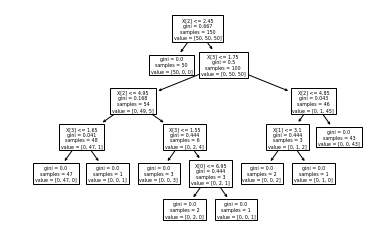

In [3]:
tree.plot_tree(clf.fit(X, y)) 
plt.show()

In [4]:
# 回归树
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

print ("Regression Score:", clf.score(X_test, y_test))


Regression Score: 0.8429442221771891


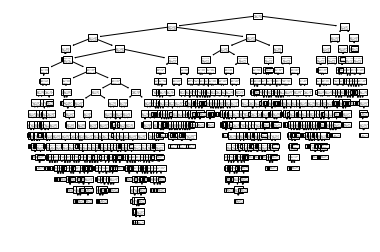

In [5]:
tree.plot_tree(clf.fit(X, y)) 
plt.show()

## 问题精选
1. 决策树和条件概率分布的关系？
> 决策树可以表示成给定条件下类的条件概率分布. 决策树中的每一条路径都对应是划分的一个条件概率分布. 每一个叶子节点都是通过多个条件之后的划分空间，在叶子节点中计算每个类的条件概率，必然会倾向于某一个类，即这个类的概率最大.
2. 为什么使用信息增益，越大越能得到好的模型？
> 上面提到过，信息熵表示数据的混乱的程度，信息增益是信息熵和条件信息熵的差值，表示的熵减少的程度，信息增益越大，代表根据我们的决策树规则得到的数据越趋向于规整，这就是我们划分类别的目的. 
3. 为什么从信息增益变到信息增益比，目的何在？
> 信息增益根据特征之后的条件信息熵，这样的话偏向于特征取值较多的特征的问题，因此使用信息增益比对这个问题进行校正. 
4. 为什么要进行剪枝？
> 在构造决策树的过程中，我们的两个停止条件是，子集只有一个类别和没有可以选择的特征，这是我们全部利用了数据中的所有可以使用的信息，但是我们知道数据是可能有误差了，而且数据不足，我们需要得到更鲁棒的模型，剪枝的意义就是是的深度减小，这样的就相当于减少规则的情况下，决策树的性能反而不差，使其更加鲁棒.
5. ID3和C4.5算法可以处理实数特征吗？如果可以应该怎么处理？如果不可以请给出理由？
> ID3和C4.5使用划分节点的方法分别是信息增益和信息增益比，从这个公式中我们可以看到 这是处理类别特征的方法，实数特征能够计算信息增益吗？我们可以定义X是实数特征的信息增益是，$$G(D|X:t)=H(D)-H(D|X:t)$$
其中
$$H(D|X:t)=H(D|x \leq t)p(x \leq t)+H(D|x>t)p(x>t)$$ $$G(D|X)=max_t=G(D|X:t)$$
对于每一个实数可以使用这种方式进行分割. 除此之外,我们还可以使用特征的分桶，将实数特征映射到有限个桶中，可以直接使用ID3和C4.5算法.
6. 基尼系数存在的问题? 
> 基尼指数偏向于多值属性;当类数较大时，基尼指数求解比较困难;基尼指数倾向于支持在两个分区中生成大小相同的测试。

## sklearn 决策树参数

我们掌握理论之后,就去看看sklearn中决策树的实现.

DecisionTreeClassifier: sklearn中多分类决策树的接口.

Paramters: 
```
criterion : str, 可选参数(default="gini")
    这个参数表示使用什么度量划分的质量. gini: 表示使用基尼指数.
    entropy: 表示使用的是信息增益.
splitter : str, optional(default="best")
    选择分割节点的策略. 支持最优(best)和随机(random)两种方式.

max_depth : int or None, optional(dafault=None)
    表示决策树的最大深度. None: 表示不设置深度,可以任意扩展,
    直到叶子节点的个数小于min_samples_split个数.
min_samples_split : int, float, optional(default=2)
    表示最小分割样例数.
    if int, 表示最小分割样例树,如果小于这个数字,不在进行分割.
    if float, 表示的比例[0,1],最小的分割数字=ceil(min_samples_split * n_samples)

min_samples_leaf : int, float, optional (default=1)
    表示叶节点最少有min_samples_leaf个节点树,如果小于等于这个数,直接返回.
    if int, min_samples_leaf就是最小样例数.
    if float, 表示的比例[0,1],最小的样例数=ceil(min_samples_leaf * n_samples)
    
min_weight_fraction_leaf : float, optional (default=0.) 
    
max_features : int, float, str or None, optional(default=None)
    进行最优分割时,特征的最大个数.
    if int, max_features是每次分割的最大特征数
    if float, int(max_features * n_features)作为最大特征数
    if "auto", 则max_features=sqrt(n_features)
    if "sqrt", 则max_features=sqrt(n_features)
    if "log2", 则max_features=log2(n_features)
    if None, 则max_features=n_features
    
random_state : int, RandomState instance or None, optional (default=None)
    随机化种子, if None,使用np.random随机产生
    
max_leaf_nodes : int or None, optional (default=None)
    最大的叶子节点个数,如果大于这个值,需要进行继续划分. None则表示没有限制.

min_impurity_decrease : float, optional (default=0.)
    分割之后基尼指数大于这个数,则进行分割.
    N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
                    
min_impurity_split : float, default=1e-7
    停止增长的阈值,小于这个值直接返回.
```

DecisionTreeRegressor: sklearn中回归树的接口.
```
criterion : str, optional (default=”mse”)
    其他参数和分类树类似.
    mse: mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node,
    mae: mean absolute error, which minimizes the L1 loss using the median of each terminal node.
```



## 代码实现

使用cart树的分类和回归两个接口,接口参考sklearn.


In [15]:
import copy
import numbers
import warnings
from math import ceil

import numpy as np
import pandas as pd
from scipy.sparse import issparse

from collections import Counter

In [23]:
class DecisionTree(object):
    """自定的树结构,用来保存决策树.
    
    Paramters:
    ----------
    col: int, default(-1)
        当前使用的第几列数据
    
    val: int or float or str, 分割节点
        分割节点的值, 
        int or float : 使用大于进行比较 
        str : 使用等于模式
    
    LeftChild: DecisionTree
        左子树, <= val
    
    RightChild: DecisionTree
        右子树, > val
    
    results: 
    """
    def __init__(self, col=-1, val=None, LeftChild=None, RightChild=None, result=None):
        self.col = col
        self.val = val
        self.LeftChild = LeftChild
        self.RightChild = RightChild
        self.result = result


class DecisionTreeClassifier(object):
    """使用基尼指数的分类决策树接口.
    
    Paramters:
    ---------
    max_depth : int or None, optional(dafault=None)
        表示决策树的最大深度. None: 表示不设置深度,可以任意扩展,
        直到叶子节点的个数小于min_samples_split个数.

    min_samples_split : int, optional(default=2)
        表示最小分割样例数.
        if int, 表示最小分割样例树,如果小于这个数字,不在进行分割.

    min_samples_leaf : int, optional (default=1)
        表示叶节点最少有min_samples_leaf个节点树,如果小于等于这个数,直接返回.
        if int, min_samples_leaf就是最小样例数.

    min_impurity_decrease : float, optional (default=0.)
        分割之后基尼指数大于这个数,则进行分割.
        N_t / N * (impurity - N_t_R / N_t * right_impurity
                        - N_t_L / N_t * left_impurity)

    min_impurity_split : float, default=1e-7
        停止增长的阈值,小于这个值直接返回.
    
    Attributes
    ----------
    classes_ : array of shape (n_classes,) or a list of such arrays
        表示所有的类
    
    feature_importances_ : ndarray of shape (n_features,)
        特征重要性, 被选择最优特征的次数,进行降序.
    
    tree_ : Tree object
        The underlying Tree object.
    """
    def __init__(self,
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_impurity_decrease=0.,
                 min_impurity_split=1e-7):        
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_impurity_decrease = min_impurity_decrease
        self.min_impurity_split = min_impurity_split
        self.classes_ = None
        self.max_features_ = None
        self.decision_tree = None
        self.all_feats = None   # 所有feature集合
    
    
    def fit(self, X, y, check_input=True):
        """使用X和y训练决策树的分类模型.
        
        Parameters
        ----------
        X : {array-like} of shape (n_samples, n_features)
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32``
            
        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels) as integers or strings.
        
        check_input : bool, (default=True)
            Allow to bypass several input checking.
        
        Returns
        -------
        self : object
            Fitted estimator.
        """
        if isinstance(X, list):
            X = self.__check_array(X)
        if isinstance(y, list):
            y = self.__check_array(y)
        if X.shape[0] != y.shape[0]:
            raise ValueError("输入的数据X和y长度不匹配")
        
        self.classes_ = list(set(y))
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.DataFrame):
            y = y.values
        
        data_origin = np.c_[X, y]
        # print (data_origin)
        self.all_feats = [i for i in range(X.shape[1])]
        self.max_features_ = X.shape[0]
        
        data = copy.deepcopy(data_origin)
        self.decision_tree = self.__build_tree(data, 0)


    def __predict_one(self, input_x):
        """预测一个样例的返回结果.
        
        Paramters:
        ---------
        input_x : list or np.ndarray
            需要预测输入数据
        
        Returns:
        -------
        class : 对应的类
        """
        
        tree = self.decision_tree
        #============================= show me your code =======================
        
        def iterative_predict(input_x, tree):
            #  递归函数退出条件 
                # -》当遍历到叶子节点时，tree.result！= None
                # -》即预测出对应的label
            if not tree.result is None:
                return tree.result
            val = input_x[tree.col]
            if isinstance(val, str):
                if val == tree.val:
                    tree = tree.LeftChild
                else: 
                    tree = tree.RightChild
            elif isinstance(val, int) or isinstance(val, float):
                if val <= tree.val:
                    tree = tree.LeftChild
                else: 
                    tree = tree.RightChild
            return iterative_predict(input_x, tree)
        
        pre_y = iterative_predict(input_x, tree)
        
        #============================= show me your code =======================
        return pre_y
    
    
    def predict(self, test):
        """预测函数,
        
        Paramters:
        ---------
        test: {array-like} of shape (n_samples, n_features)
        
        Returns:
        result : np.array(list) 
        """
        result = []
        for i in range(len(test)):
            result.append(self.__predict_one(test[i]))
        return np.array(result)
    
    
    def score(self, vali_X, vali_y):
        """验证模型的特征,这里使用准确率.
        Parameters
        ----------
        vali_X : {array-like} of shape (n_samples, n_features)
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32``

        vali_y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels) as integers or strings.
        
        Returns:
        -------
        score : float, 预测的准确率
        """
        vali_y = np.array(vali_y)
        pre_y = self.predict(vali_X)
        pre_score = 1.0 * sum(vali_y == pre_y) / len(vali_y)
        return pre_score
    
    
    def __build_tree(self, data, depth):
        """创建决策树的主要代码
        
        Paramters:
        ---------
        data : {array-like} of shape (n_samples, n_features) + {label}
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32``
        
        depth: int, 树的深度
        
        Returns:
        -------
        DecisionTree
            
        """        
        labels = np.unique(data[:,-1])
        
        
        #step1：
            # 只剩下唯一的类别时,停止,返回对应类别 
                # -》 所有实例属于同一类，将该类作为该结点的类标记
        if len(labels) == 1:
            return DecisionTree(result=list(labels)[0])
        
        
        #step2:
            # 遍历完所有特征时,只剩下label标签,就返回出现字数最多的类标签 
                # -》特征集合为空集，将实例数最大的类作为该结点的类标记
        if not self.all_feats:
            return DecisionTree(result=np.argmax(np.bincount(data[:,-1].astype(int))))
        
            # 超过最大深度,则停止,使用出现最多的参数作为该叶子节点的类
        if self.max_depth and depth > self.max_depth:
            return DecisionTree(result=np.argmax(np.bincount(data[:,-1].astype(int))))

            # 如果剩余的样本数大于等于给定的参数 min_samples_split,
            # 则不在进行分割, 直接返回类别中最多的类,该节点作为叶子节点
        if self.min_samples_split >= data.shape[0]:
            return DecisionTree(result=np.argmax(np.bincount(data[:,-1].astype(int))))

            # 叶子节点个数小于指定参数就进行返回,叶子节点中的出现最多的类
        if self.min_samples_leaf >= data.shape[0]:
            return DecisionTree(result=np.argmax(np.bincount(data[:,-1].astype(int))))
        
        
        #step3:
            # 根据基尼指数选择每个分割的最优特征
            # -》选择gini系数最小的特征及其对应的分割点 作为最优特征与最优分割点
        best_idx, best_val, min_gini = self.__getBestFeature(data)
        # print ("Current best Feature:", best_idx, best_val, min_gini)
        # 如果当前的gini指数小于指定阈值,直接返回
        if min_gini < self.min_impurity_split:
            return DecisionTree(result=np.argmax(np.bincount(data[:,-1].astype(int))))
        
        
        #step4:
            # 对两个子节点采用step3的策略进行递归划分，直到满足step2的停止条件
        leftData, rightData = self.__splitData(data, best_idx, best_val)
        
        #============================= show me your code =======================
        
        leftDecisionTree = self.__build_tree(data=leftData,
                                             depth=depth+1)
        rightDecisionTree = self.__build_tree(data=rightData,
                                              depth=depth+1)
        
        #============================= show me your code =======================
        
        return DecisionTree(col=best_idx, val=best_val, LeftChild=leftDecisionTree, RightChild=rightDecisionTree)

    
    def __getBestFeature(self, data):
        """得到最优特征对应的列
        Paramters:
        ---------
        data: np.ndarray
            从data中选择最优特征
            
        Returns:
        -------
        bestInx, val, 最优特征的列的索引和使用的值.
        """
        best_idx = -1
        best_val = None
        min_gini = 1.0                
        # 遍历现在可以使用的特征列
        #============================= show me your code =======================
        
        for featColumn in self.all_feats:
            # 大类level
            data_with_feature = data[:,featColumn]
            # 每一个大类下细分类别val
            for val in data_with_feature:
                # 根据 细分类别val 划分数据集分成左右子树并计算对应划分的gini系数
                leftData, rightData = self.__splitData(data, featColumn, val)
                left_gini = self.gini(labels=leftData[:,-1])
                right_gini = self.gini(labels=rightData[:,-1])
                # 计算 当前划分的gini系数 = left_gini + right_gini
                current_gini = left_gini*len(leftData)/len(data) + right_gini*len(rightData)/len(data)
                # 算法停止条件：样本集的gini系数小于阈值-》说明样本属于同一类
                if current_gini < min_gini:
                    best_idx = featColumn
                    best_val = val
                    min_gini = current_gini
        
        #============================= show me your code =======================
        # 删除使用过的特征
        self.all_feats.remove(best_idx)
        
        return best_idx, best_val, min_gini
    
    def calculateDiffCount(self, datas):
        return dict(Counter(datas))
        
    
    def gini(self, labels):
        """计算基尼指数.
        
        Paramters:
        ----------
        labels: list or np.ndarray, 数据对应的类目集合.
        
        Returns: i
        -------
        gini : float ``` Gini(p) = \sum_{k=1}^{K}p_k(1-p_k)=1-\sum_{k=1}^{K}p_k^2 ```
        
        """
        #============================= show me your code =======================
        
        labels = self.__check_array(labels)
        
        total_num = len(labels)
        labels_dict = self.calculateDiffCount(labels)
        p_sum = 0.0
        
        for i in labels_dict:
            p_sum += (labels_dict[i]/total_num)**2
        gini = 1- p_sum
        
        #============================= show me your code =======================
        return gini
    
    
    def __splitData(self, data, featColumn, val):
        '''根据特征划分数据集分成左右两部分.
        Paramters:
        ---------
        data: np.ndarray, 分割的数据
        
        featColumn : int, 使用第几列的数据进行分割
        
        val : int or float or str, 分割的值
            int or float : 使用比较方式
            str : 使用相等方式
        
        Returns:
        -------
        leftData, RightData
            int or left: leftData <= val < rightData
            str : leftData = val and rightData != val
        '''
        if isinstance(val, str):
            leftData = data[data[:, featColumn] == val]
            rightData = data[data[:, featColumn] != val]
        elif isinstance(val, int) or isinstance(val, float):
            leftData = data[data[:, featColumn] <= val]
            rightData = data[data[:, featColumn] > val]
        return leftData, rightData
    
    
    def __check_array(self, X):
        """检查数据类型
        Parameters:
        ----------
        X : {array-like} of shape (n_samples, n_features)
            The training input samples.
        
        Retures
        -------
        X: {array-like} of shape (n_samples, n_features)
        """
        if isinstance(X, list):
            X = np.array(X)
        if not isinstance(X, np.ndarray) and not isinstance(X, pd.DataFrame):
            raise ValueError("输出数据不合法,目前只支持np.ndarray or pd.DataFrame")
        return X

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    # 分类树
    X, y = load_iris(return_X_y=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = DecisionTreeClassifier()

    clf.fit(X_train, y_train)

    print ("Classifier Score:", clf.score(X_test, y_test))

Classifier Score: 0.9666666666666667
